In [2]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
from sklearn.cluster import KMeans
all_nodes = pd.read_csv("terrorist_attack.nodes", header = None, sep="\t", encoding="utf-8")
edges = pd.read_csv("terrorist_attack_loc.edges", header = None, sep="\t", encoding="utf-8")
labels = pd.read_csv("terrorist_attack.labels", header = None, sep="\t", encoding="utf-8")
edges = edges[0].str.split(' ',expand=True)
labels_extracted = all_nodes[107].str.split('#',expand=True)
labels = labels_extracted[1]
labels = labels.values
all_nodes[0][120]
features = all_nodes.values[:,1:107]

### Adjacency Matrix:

In [3]:
n_nodes = len(all_nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)
number_link = 0
n2 = 0

for idx, row in edges.iterrows():
    
    i = np.where(all_nodes[0] == row.loc[0])
    j = np.where(all_nodes[0] == row.loc[1])
    n2 = n2 + 1
    
    if (i[0].size != 0 and j[0].size != 0):
        adjacency[i[0], j[0]] = 1
        adjacency[j[0], i[0]] = 1
        number_link = number_link + 1

In [4]:
adjacency.shape

(1293, 1293)

Text(0.5, 1.05, 'adjacency matrix')

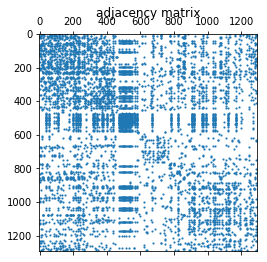

In [5]:
plt.spy(adjacency, markersize=1)
plt.title('adjacency matrix')

In [6]:
degree =  sum(adjacency)

assert len(degree) == n_nodes

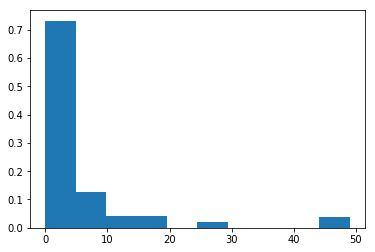

In [7]:
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights);

Giant Component 

In [8]:
G = nx.from_numpy_matrix(adjacency)
graphs = nx.connected_component_subgraphs(G)
graphs = list(graphs)
print(len(graphs))

787


In [9]:
giant = max(graphs, key=len)
sorted_graphs = sorted(graphs, key=len)
second_giant_graph = sorted_graphs[785]
ss = nx.to_scipy_sparse_matrix(second_giant_graph)
second_giant = ss.todense()

In [10]:
A = nx.to_scipy_sparse_matrix(giant)
giant_component = A.todense()

In [11]:
giant_component.shape

(51, 51)

In [12]:
second_giant.shape

(29, 29)

In [13]:
GG = nx.from_numpy_matrix(giant_component)
GG2 = nx.from_numpy_matrix(second_giant)

### Laplacian 

In [14]:
deg_matrix = np.diag(degree)
laplacian_combinatorial =  scipy.sparse.csr_matrix(deg_matrix - adjacency)

In [15]:
deg_giant = np.sum(giant_component, axis=0)
deg_giant_matrix = np.diag(deg_giant)

giant_laplacian =  scipy.sparse.csr_matrix(deg_giant_matrix - giant_component)

e, U = scipy.linalg.eig(giant_laplacian.toarray())
inds = e.argsort()
U = U[inds]
e = np.sort(e)

lmax = e[50]

In [16]:
deg_second_giant = np.sum(second_giant, axis = 0)
deg_second_giant_matrix = np.diag(deg_second_giant)

second_giant_laplacian = scipy.sparse.csr_matrix(deg_second_giant_matrix - second_giant)
e2, U2 = scipy.linalg.eig(second_giant_laplacian.toarray())
inds2 = e2.argsort()
U2 = U2[inds2]
e2 = np.sort(e2)


### Graph Plot


C:\Users\joelle hanna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


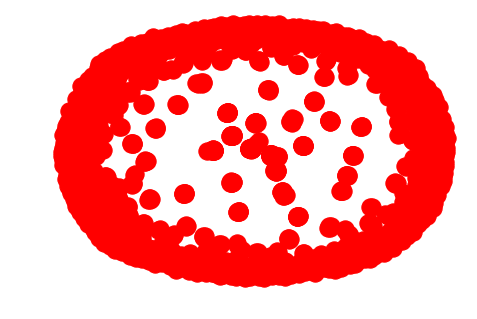

In [17]:
# Complete Graph
nx.draw(G)

C:\Users\joelle hanna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


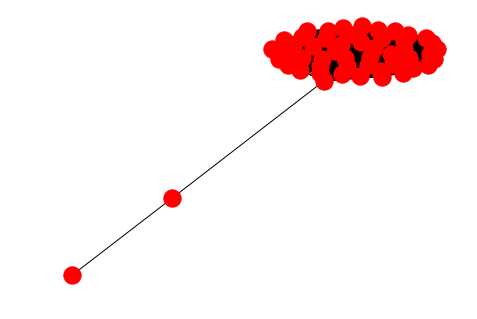

In [18]:
# Giant Component Graph
nx.draw(GG)

C:\Users\joelle hanna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


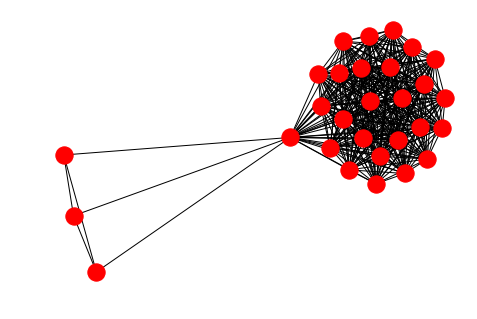

In [19]:
# Second Giant Component Graph
nx.draw(GG2)

In [17]:
sorted(second_giant_graph.nodes)

[20,
 22,
 51,
 53,
 67,
 101,
 115,
 119,
 128,
 151,
 158,
 165,
 166,
 180,
 190,
 199,
 201,
 227,
 235,
 255,
 264,
 334,
 381,
 851,
 857,
 860,
 1076,
 1077,
 1279]

### Labels 

In [18]:
labels_giant = labels[giant.nodes]
sorted(giant.nodes);

In [19]:
labels_second_giant = labels[second_giant_graph.nodes]
sorted(second_giant_graph.nodes);
labels_second_giant

array(['Bombing', 'Bombing', 'Arson', 'Arson', 'Bombing', 'Bombing',
       'Weapon_Attack', 'Bombing', 'Bombing', 'Bombing', 'Bombing',
       'Bombing', 'Weapon_Attack', 'Weapon_Attack', 'Bombing', 'Bombing',
       'Bombing', 'Bombing', 'Bombing', 'Weapon_Attack', 'Weapon_Attack',
       'Weapon_Attack', 'Bombing', 'Bombing', 'Bombing', 'Bombing',
       'Bombing', 'Bombing', 'Bombing'], dtype=object)

In [20]:
labels_giant[labels_giant == 'Arson'] = 1
labels_giant[labels_giant == 'Bombing'] = 2
labels_giant[labels_giant == 'Weapon_Attack'] = 3
labels_giant[labels_giant == 'other_attack'] = 4
labels_giant[labels_giant == 'Kidnapping'] = 5

In [21]:
labels_second_giant[labels_second_giant == 'Arson'] = 1
labels_second_giant[labels_second_giant == 'Bombing'] = 2
labels_second_giant[labels_second_giant == 'Weapon_Attack'] = 3
labels_second_giant[labels_second_giant == 'other_attack'] = 4
labels_second_giant[labels_second_giant == 'Kidnapping'] = 5

C:\Users\joelle hanna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Biggest Connected Component : 51 Attacks')

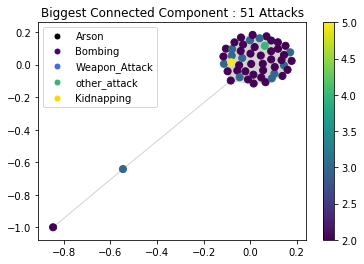

In [22]:
graph = nx.from_scipy_sparse_matrix(scipy.sparse.csr_matrix(giant_component))
coords = nx.spring_layout(graph)

im = nx.draw_networkx_nodes(graph, coords, node_size=50, node_color=labels_giant, edge_labels=labels_giant)
nx.draw_networkx_edges(graph, coords, edge_color='lightgray')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Arson',
                          markerfacecolor='k', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Bombing',
                          markerfacecolor='indigo', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Weapon_Attack',
                          markerfacecolor='royalblue', markersize=7),
                  Line2D([0], [0], marker='o', color='w', label='other_attack',
                          markerfacecolor='mediumseagreen', markersize=7),
                  Line2D([0], [0], marker='o', color='w', label='Kidnapping',
                          markerfacecolor='gold', markersize=7)]

plt.colorbar(im)
plt.legend(handles=legend_elements)
plt.title("Biggest Connected Component : 51 Attacks")

C:\Users\joelle hanna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Second Biggest Connected Component : 29 Attacks')

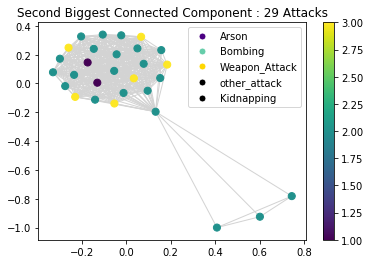

In [23]:
graph = nx.from_scipy_sparse_matrix(scipy.sparse.csr_matrix(second_giant))
coords = nx.spring_layout(graph)

im = nx.draw_networkx_nodes(graph, coords, node_size=50, node_color=labels_second_giant, edge_labels=labels_second_giant)
nx.draw_networkx_edges(graph, coords, edge_color='lightgray')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Arson',
                          markerfacecolor='indigo', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Bombing',
                          markerfacecolor='mediumaquamarine', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Weapon_Attack',
                          markerfacecolor='gold', markersize=7),
                  Line2D([0], [0], marker='o', color='w', label='other_attack',
                          markerfacecolor='k', markersize=7),
                  Line2D([0], [0], marker='o', color='w', label='Kidnapping',
                          markerfacecolor='k', markersize=7)]

plt.colorbar(im)
plt.legend(handles=legend_elements)
plt.title("Second Biggest Connected Component : 29 Attacks")

### Incidence Matrix


In [24]:
S_complete = nx.incidence_matrix(G)

S_giant_component = nx.incidence_matrix(GG)

S_second_giant_component = nx.incidence_matrix(GG2)

### Features

In [79]:
def features_nodes(nb):
    compt = 0
    nodes_ex = [None]*features.shape[0]
    for i in range (0,features.shape[0]):
        if features[i][nb] == 1:
            nodes_ex [compt] = labels[i]
            compt = compt + 1
    nodes_ex = nodes_ex[0:compt] 
    nb_arson = 0
    nb_bombing = 0
    nb_weapon_attack = 0
    nb_kidnapping = 0
    nb_other_attack = 0
    for i in range (0,len(nodes_ex)):
        if nodes_ex[i] == 'Arson':
            nb_arson = nb_arson+1
        elif nodes_ex[i] == 'Bombing':
            nb_bombing = nb_bombing+1
        elif nodes_ex[i] == 'Kidnapping':
            nb_kidnapping = nb_kidnapping+1
        elif nodes_ex[i] == 'Weapon_Attack':
            nb_weapon_attack = nb_weapon_attack+1
        else:
            nb_other_attack = nb_other_attack +1
    if compt != 0:
        print("Percentage of Arson = " + str(nb_arson/compt*100))
        print("Percentage of Bombing = " + str(nb_bombing/compt*100))
        print("Percentage of kidnapping = " + str(nb_kidnapping/compt*100))
        print("Percentage of Weapon attack = " + str(nb_weapon_attack/compt*100))
        print("Percentage of Other attack = " + str(nb_other_attack/compt*100))
    
    return nodes_ex

In [85]:
nodes_1 = features_nodes(60) #when the 1st column of features == 1

Percentage of Arson = 2.4691358024691357
Percentage of Bombing = 37.03703703703704
Percentage of kidnapping = 14.814814814814813
Percentage of Weapon attack = 45.67901234567901
Percentage of Other attack = 0.0
